In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Binary/Base_classifier_result(URL-HTML cross).csv")
data

,labels,dt_prediction_non,dt_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish
0,1,0.118421,0.881579,0.714286,0.285714,0.172431,0.827569
1,0,0.989712,0.010288,1.000000,0.000000,0.994514,0.005486
2,0,1.000000,0.000000,1.000000,0.000000,0.999234,0.000766
3,0,0.981481,0.018519,1.000000,0.000000,0.953506,0.046494
4,0,1.000000,0.000000,1.000000,0.000000,0.968014,0.031986
...,...,...,...,...,...,...,...
2933,0,1.000000,0.000000,1.000000,0.000000,0.995678,0.004322
2934,1,0.028369,0.971631,0.285714,0.714286,0.124511,0.875489
2935,0,0.989712,0.010288,1.000000,0.000000,0.994514,0.005486
2936,0,0.981481,0.018519,1.000000,0.000000,0.976675,0.023325


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   labels                2938 non-null   int64  
 1   dt_prediction_non     2938 non-null   float64
 2   dt_prediction_phish   2938 non-null   float64
 3   knn_prediction_non    2938 non-null   float64
 4   knn_prediction_phish  2938 non-null   float64
 5   XGB_prediction_non    2938 non-null   float64
 6   XGB_prediction_phish  2938 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 160.8 KB


In [5]:
data.head()

,labels,dt_prediction_non,dt_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish
0,1,0.118421,0.881579,0.714286,0.285714,0.172431,0.827569
1,0,0.989712,0.010288,1.000000,0.000000,0.994514,0.005486
2,0,1.000000,0.000000,1.000000,0.000000,0.999234,0.000766
3,0,0.981481,0.018519,1.000000,0.000000,0.953506,0.046494
4,0,1.000000,0.000000,1.000000,0.000000,0.968014,0.031986


In [6]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(2938, 6) (2938,)


In [7]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  #create model
  model = Sequential()
  model.add(Dense(5, input_dim=6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  cm
  tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  print('True Positive', tp)
  print('True Negative', tn)
  print('False Positive', fp)
  print('False Negative', fn)

  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))

  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.4060 - accuracy: 0.9743 - val_loss: 0.3515 - val_accuracy: 0.9694
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.9754 - val_loss: 0.2905 - val_accuracy: 0.9694
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.9766 - val_loss: 0.2432 - val_accuracy: 0.9762
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9781 - val_loss: 0.2112 - val_accuracy: 0.9728
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9784 - val_loss: 0.1848 - val_accuracy: 0.9694
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9781 - val_loss: 0.1628 - val_accuracy: 0.9694
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9777 - val_loss: 0.1428 - val_accuracy: 0.9728
Epoch 8/100
8

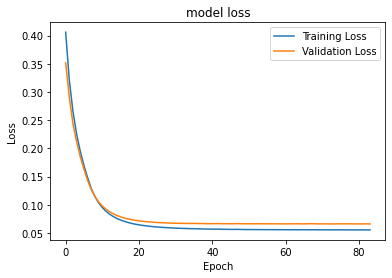

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       227
           1       0.97      0.93      0.95        67

    accuracy                           0.98       294
   macro avg       0.97      0.96      0.97       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9761904761904762
True Positive 62
True Negative 225
False Positive 2
False Negative 5
Precision: 0.9688
Recall: 0.9254
F1 Score: 0.9466
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.4845 - accuracy: 0.8343 - val_loss: 0.3074 - val_accuracy: 0.9898
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.9743 - val_loss: 0.1938 - val_accuracy: 0.9932
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9781 - val_loss: 0.1376 - val_accuracy: 0.9932
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1471 

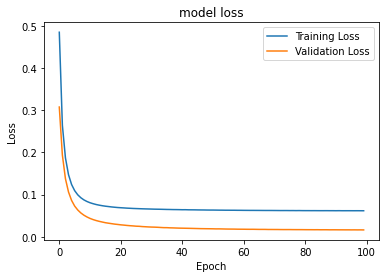

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00        62

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

Accuracy: 1.0
True Positive 62
True Negative 232
False Positive 0
False Negative 0
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.3645 - accuracy: 0.7549 - val_loss: 0.2785 - val_accuracy: 0.7721
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.8703 - val_loss: 0.2367 - val_accuracy: 0.9150
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9557 - val_loss: 0.1991 - val_accuracy: 0.9558
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1651 - accuracy: 0.9

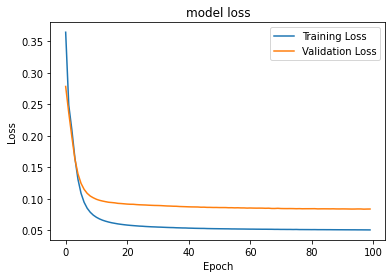

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       227
           1       0.94      0.93      0.93        67

    accuracy                           0.97       294
   macro avg       0.96      0.95      0.96       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9693877551020408
True Positive 62
True Negative 223
False Positive 4
False Negative 5
Precision: 0.9394
Recall: 0.9254
F1 Score: 0.9323
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.6614 - accuracy: 0.6657 - val_loss: 0.5691 - val_accuracy: 0.9558
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.9610 - val_loss: 0.5085 - val_accuracy: 0.9660
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.9663 - val_loss: 0.4689 - val_accuracy: 0.9660
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4414 

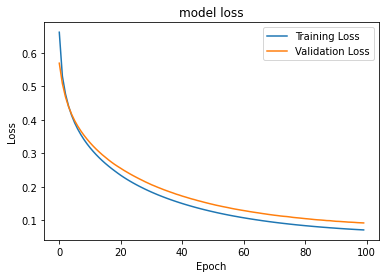

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       225
           1       0.94      0.99      0.96        69

    accuracy                           0.98       294
   macro avg       0.97      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9829931972789115
True Positive 68
True Negative 221
False Positive 4
False Negative 1
Precision: 0.9444
Recall: 0.9855
F1 Score: 0.9645
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.5498 - accuracy: 0.7561 - val_loss: 0.4403 - val_accuracy: 0.7619
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.7561 - val_loss: 0.3547 - val_accuracy: 0.7619
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.7568 - val_loss: 0.2900 - val_accuracy: 0.8469
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2634 

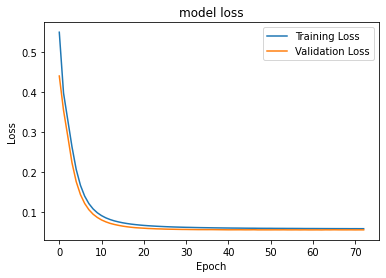

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       224
           1       0.99      0.94      0.96        70

    accuracy                           0.98       294
   macro avg       0.98      0.97      0.98       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9829931972789115
True Positive 66
True Negative 223
False Positive 1
False Negative 4
Precision: 0.9851
Recall: 0.9429
F1 Score: 0.9635
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.6132 - accuracy: 0.9376 - val_loss: 0.5476 - val_accuracy: 0.9660
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.9724 - val_loss: 0.4780 - val_accuracy: 0.9728
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.9754 - val_loss: 0.4380 - val_accuracy: 0.9728
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4292 

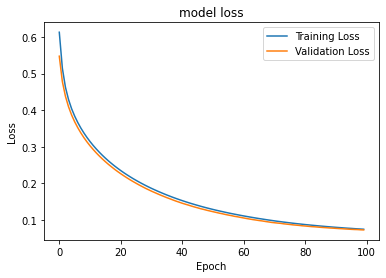

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       220
           1       0.99      0.93      0.96        74

    accuracy                           0.98       294
   macro avg       0.98      0.96      0.97       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9795918367346939
True Positive 69
True Negative 219
False Positive 1
False Negative 5
Precision: 0.9857
Recall: 0.9324
F1 Score: 0.9583
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.3898 - accuracy: 0.7553 - val_loss: 0.3126 - val_accuracy: 0.7687
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.7553 - val_loss: 0.2627 - val_accuracy: 0.7687
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2524 - accuracy: 0.9232 - val_loss: 0.2377 - val_accuracy: 0.9524
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2324 

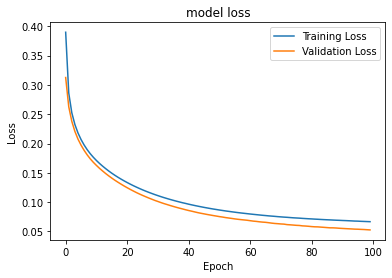

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       226
           1       0.96      1.00      0.98        68

    accuracy                           0.99       294
   macro avg       0.98      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294

Accuracy: 0.9897959183673469
True Positive 68
True Negative 223
False Positive 3
False Negative 0
Precision: 0.9577
Recall: 1.0000
F1 Score: 0.9784
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5495 - accuracy: 0.9648 - val_loss: 0.4333 - val_accuracy: 0.9796
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.9716 - val_loss: 0.2696 - val_accuracy: 0.9728
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9739 - val_loss: 0.1899 - val_accuracy: 0.9762
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1726 

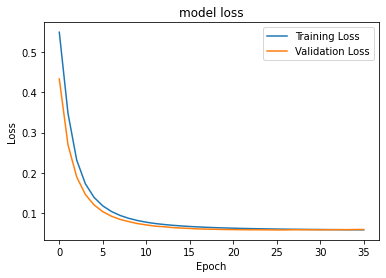

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       225
           1       0.94      0.99      0.96        69

    accuracy                           0.98       294
   macro avg       0.97      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9829931972789115
True Positive 68
True Negative 221
False Positive 4
False Negative 1
Precision: 0.9444
Recall: 0.9855
F1 Score: 0.9645
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.4316 - accuracy: 0.9682 - val_loss: 0.2785 - val_accuracy: 0.9693
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9766 - val_loss: 0.1652 - val_accuracy: 0.9693
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9758 - val_loss: 0.1224 - val_accuracy: 0.9693
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1036 

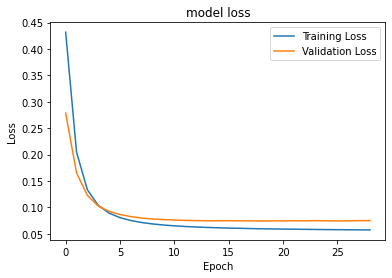

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       198
           1       0.98      0.96      0.97        95

    accuracy                           0.98       293
   macro avg       0.98      0.97      0.98       293
weighted avg       0.98      0.98      0.98       293

Accuracy: 0.9795221843003413
True Positive 91
True Negative 196
False Positive 2
False Negative 4
Precision: 0.9785
Recall: 0.9579
F1 Score: 0.9681
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.6222 - accuracy: 0.7667 - val_loss: 0.5216 - val_accuracy: 0.9795
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.9758 - val_loss: 0.4585 - val_accuracy: 0.9795
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.9758 - val_loss: 0.4225 - val_accuracy: 0.9795
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4193 

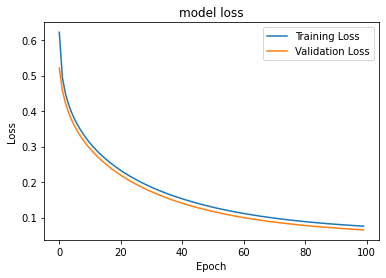

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       219
           1       0.96      0.97      0.97        74

    accuracy                           0.98       293
   macro avg       0.98      0.98      0.98       293
weighted avg       0.98      0.98      0.98       293

Accuracy: 0.9829351535836177
True Positive 72
True Negative 216
False Positive 3
False Negative 2
Precision: 0.9600
Recall: 0.9730
F1 Score: 0.9664
Average Validation Accuracy: 0.9826402916115251


In [8]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0

kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

